In [1]:
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

We'll be pulling the correlation and formation energy data from our casm project using 'casm query -k 'corr,formation_energy' -j -o outputfile.json

TODO: Need to change this to output from casm query -k -j -o outputfile.txt

In [18]:
#filenames
#add object to figure out which ECIs you want selected
#ex. ECI_on = [1 2 3 4 5]
#have something to pick which corr's to turn on
#easier to load JSON data in instead

In [2]:
#data_file = sys.argv[1] #output of "casm query -k 'corr,formation_energy,comp' -j -o outputfile.txt"
data_file = 'output_data.json'
corr_file = 'output_corr.json'
energy_file = 'output_energies.json'
with open(corr_file) as f:
    corr_data = json.load(f)
    f.close()
with open(energy_file) as f:
    energy_data = json.load(f)
    f.close()
with open(data_file) as f:
    data = json.load(f)
    f.close()

Just some testing to make sure things are importing correctly

In [20]:
print(data)

[{'comp': [[1.0]], 'configname': 'SCEL1_1_1_1_0_0_0/0', 'corr': [[1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0

#the old code
correlation_matrix_file = sys.argv[1] #output of "casm query -k 'corr' -o outputfile.txt"
formation_energies_file = sys.argv[2] #output of "casm query -k 'formation_energy' -o outputfile_energy.txt"

Splitting the data into training and test sets (test_size indicates what fraction of the data becomes the test set, setting a value for random_state allows for repeatability)

In [3]:
data_train, data_test = train_test_split(data, test_size=0.1, random_state=10)
corr_train = np.empty((len(data_train),len(data_train[0]['corr'])))
energy_train = np.empty((len(data_train),1))
comp_train = np.empty((len(data_train),1))
corr_test = np.empty((len(data_test),len(data_test[0]['corr'])))
energy_test = np.empty((len(data_test),1))
comp_test = np.empty((len(data_test),1))

In [5]:
#data_train[0]["comp"]

In [6]:
for idx,data in enumerate(data_train) #more python way of doing things

SyntaxError: invalid syntax (<ipython-input-6-ef5ecaae790d>, line 1)

In [4]:
for i in range(0,len(data_train)):
    corr_train[i] = np.array(data_train[i]['corr']).transpose()
    energy_train[i] = data_train[i]["formation_energy"]
    comp_train[i] = data_train[i]["comp"][0]
    #hull_dist_train[i] = data_train[i]["hull_dist"][0]
for i in range(0,len(data_test)):
    corr_test[i] = np.array(data_test[i]['corr']).transpose()
    energy_test[i] = data_test[i]["formation_energy"]
    comp_test[i] = data_test[i]["comp"][0]

Setting up linear regression model
Fitting first to the training set (90% of the data)
reg.coef_ is the ECIs for this fit

In [10]:
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(corr_train,energy_train)
reg.coef_


array([[ 4.89734578e-03, -1.11608860e+08, -7.70355304e+08,
         7.40413707e+07,  6.62825342e+08,  4.37263193e+08,
        -4.76473652e+08,  6.61194090e+07, -4.39900782e+08,
        -1.37205010e+08,  4.01161353e+08,  7.04231699e+08,
         5.76364994e-03,  4.38380037e-02, -2.57662833e-02,
         3.07626426e-02, -2.59668007e-02, -7.10375458e-02,
         1.32438540e-03,  1.67978704e-02,  3.22405323e-02,
         5.00980020e-03, -7.89065659e-03,  7.88187454e+08,
         7.47379381e+08,  7.20621495e+08, -1.07340818e+09,
        -1.44266456e+09, -3.91473285e+08,  1.50566389e+08,
         7.50904309e+08,  7.01066175e+08, -1.52674157e+08,
        -4.26322253e+08, -4.64672517e+08,  1.32238818e+08,
        -1.87417777e+09,  2.76654592e+08, -4.92117616e+08,
        -5.44911409e+08,  8.50791036e+08, -1.04572632e+09,
         1.70263365e+08,  8.74834499e+07, -2.21366097e+08,
        -8.34233499e+08,  7.90267911e+08, -6.92121214e+08,
        -8.04873322e+08,  1.86053664e+08, -7.70228196e+0

Printing r^2 value of the training fit

In [11]:
print(reg.score(corr_train,energy_train))

0.9741094438452705


Now predicting the energies for the test set

In [12]:
energy_predict = reg.predict(corr_test)

Calculating mean squared error & r^2 value

In [13]:
print('Mean squared error: %.2f' % mean_squared_error(energy_test,energy_predict))

print('Coefficient of determination (r^2): %.2f'
      % r2_score(energy_test, energy_predict))

Mean squared error: 0.00
Coefficient of determination (r^2): 0.95


In [28]:
#print(energy_predict)

In [29]:
#print(energy_test)

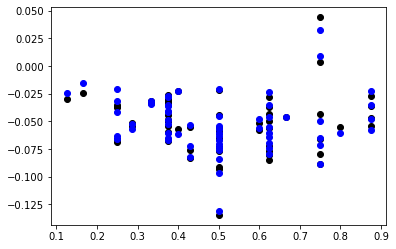

In [14]:
plt.scatter(comp_test, energy_test,  color='black')
plt.scatter(comp_test, energy_predict, color='blue')


In [15]:
len(comp_test)

63

In [7]:
#plot ECIs vs index

In [17]:
plt.scatter(range(len(reg.coef_),reg.coef_)

SyntaxError: unexpected EOF while parsing (<ipython-input-17-b27919bbccd8>, line 1)

In [ ]:
_?

In [ ]:
regCV = linear_model.LassoCV(fit_inercept=False)